In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [6]:
print("Shape:", df.shape)

Shape: (506, 14)


In [7]:
print("\nInfo:")
print(df.info())
df.head()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
print("\nSummary Statistics:\n")
print(df.describe(include='all'))


Summary Statistics:

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std  

In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

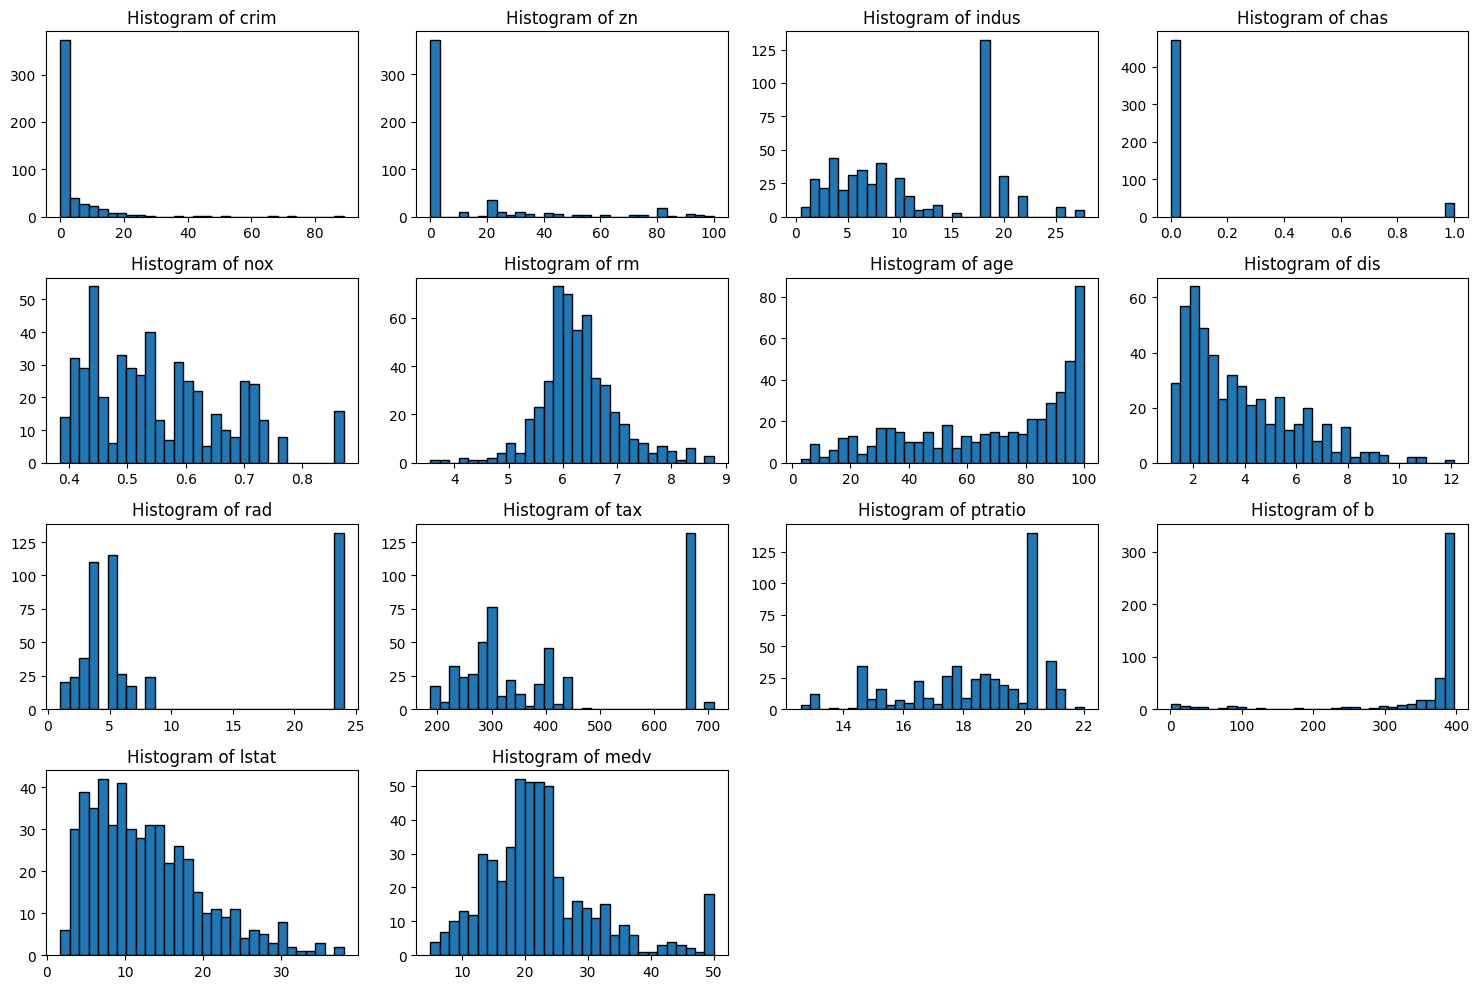

In [10]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    plt.hist(df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

<Axes: >

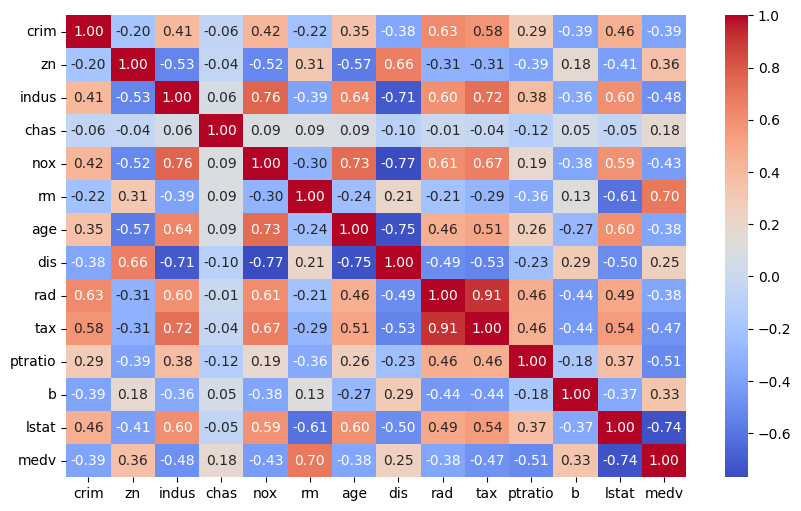

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

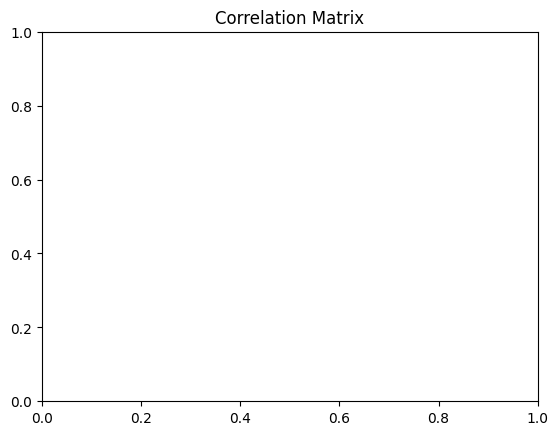

In [12]:
plt.title("Correlation Matrix")
plt.show()

In [13]:
X = df.drop("medv", axis=1)
y = df["medv"]

In [14]:
print("Features Shape:", X.shape)
print("Target Shape:", y.shape)

Features Shape: (506, 13)
Target Shape: (506,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 404
Test size: 102


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
print("Intercept:", model.intercept_)
print("\nCoefficients:")
coef_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coef_df)

Intercept: 30.24675099392366

Coefficients:
         Coefficient
crim       -0.113056
zn          0.030110
indus       0.040381
chas        2.784438
nox       -17.202633
rm          4.438835
age        -0.006296
dis        -1.447865
rad         0.262430
tax        -0.010647
ptratio    -0.915456
b           0.012351
lstat      -0.508571


In [19]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 3.189091965887837
Mean Squared Error (MSE): 24.291119474973478
R² Score: 0.6687594935356326


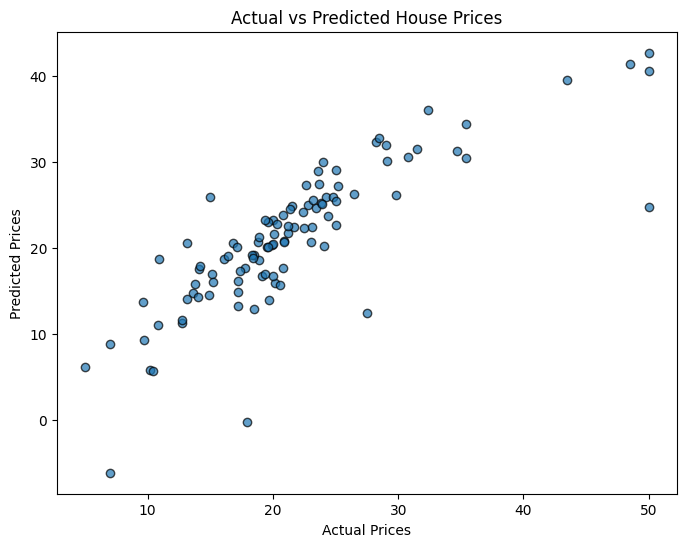

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, edgecolors='k', alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

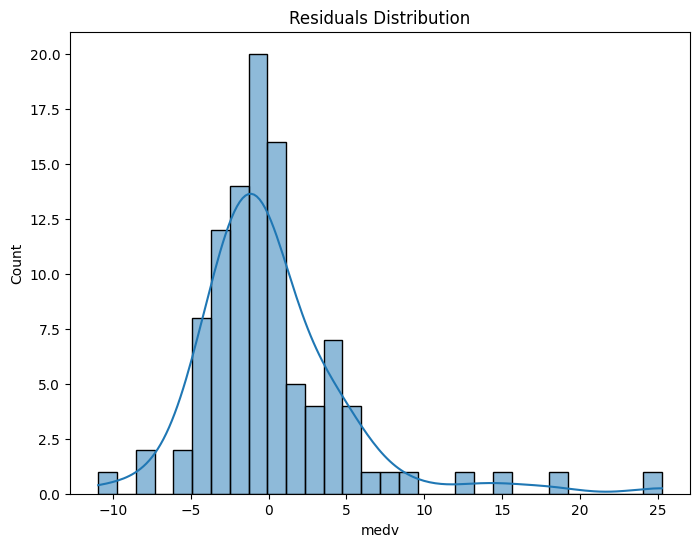

In [22]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.show()

In [23]:
print("\nSome Observations:")
print("1. Positive coefficients mean the feature increases house price.")
print("2. Negative coefficients mean the feature decreases house price.")
print("3. R² score tells how much variance is explained by the model.")
print("4. Residuals should be roughly normally distributed if assumptions hold.")


Some Observations:
1. Positive coefficients mean the feature increases house price.
2. Negative coefficients mean the feature decreases house price.
3. R² score tells how much variance is explained by the model.
4. Residuals should be roughly normally distributed if assumptions hold.
